Lead Matrix (rows: Q1-Q3 ; cols: Social, Email, Paid):
 [[120.  80. 200.]
 [150.  90. 220.]
 [180. 110. 250.]]

Cost-per-Lead Matrix (₹):
 [[50. 20. 70.]
 [48. 18. 65.]
 [46. 17. 60.]]

Total Cost Matrix (₹) per quarter × platform:
 [[ 6000.  1600. 14000.]
 [ 7200.  1620. 14300.]
 [ 8280.  1870. 15000.]]

Total cost per quarter (Q1-Q3): [21600. 23120. 25150.]
Total cost per platform (Social, Email, Paid): [21480.  5090. 43300.]
Total leads per platform (Q1-Q3): [450. 280. 670.]

Projected Q4 leads (15% growth on Q3): [207.  126.5 287.5]

Leads (rows=platforms, columns=Q1..Q4 projected):
                  Q1     Q2     Q3  Q4_projected
Social Media  120.0  150.0  180.0         207.0
Email          80.0   90.0  110.0         126.5
Paid Ads      200.0  220.0  250.0         287.5

Projected Q4 total cost per platform (₹): [ 9522.   2150.5 17250. ]

Platform-level metrics:
               Total_Leads_Q1toQ3  Total_Cost_Q1toQ3(₹)  ₹_per_lead_Q1toQ3  \
Social Media               450.0         

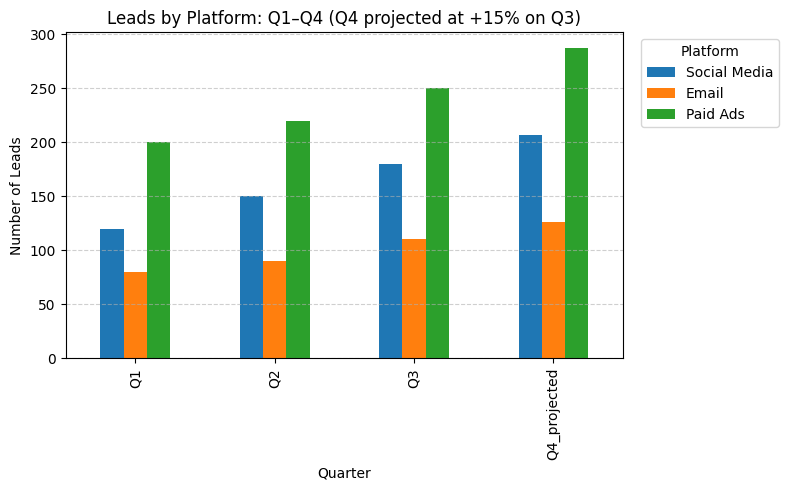


Recommendation by efficiency (Q4 leads per ₹): Email
Recommendation by growth & consistency: Social Media


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) DEFINE SAMPLE MATRICES

# Rows: Q1, Q2, Q3
# Columns: Social Media, Email Marketing, Paid Ads

lead_matrix = np.array([
    [120,  80, 200],   # Q1 leads
    [150,  90, 220],   # Q2 leads
    [180, 110, 250]    # Q3 leads
], dtype=float)

cost_per_lead = np.array([
    [50,  20, 70],     # Q1 cost per lead (₹)
    [48,  18, 65],     # Q2
    [46,  17, 60]      # Q3
], dtype=float)

quarters = ['Q1', 'Q2', 'Q3']
platforms = ['Social Media', 'Email', 'Paid Ads']

# Show inputs
print("Lead Matrix (rows: Q1-Q3 ; cols: Social, Email, Paid):\n", lead_matrix)
print("\nCost-per-Lead Matrix (₹):\n", cost_per_lead)

# 2) Total marketing cost per campaign (element-wise)

total_cost = lead_matrix * cost_per_lead   # element-wise multiply
print("\nTotal Cost Matrix (₹) per quarter × platform:\n", total_cost)

# Summaries per quarter and per platform
total_cost_per_quarter = total_cost.sum(axis=1)   # sum across platforms
total_cost_per_platform = total_cost.sum(axis=0)  # sum across quarters
total_leads_per_platform = lead_matrix.sum(axis=0)

print("\nTotal cost per quarter (Q1-Q3):", total_cost_per_quarter)
print("Total cost per platform (Social, Email, Paid):", total_cost_per_platform)
print("Total leads per platform (Q1-Q3):", total_leads_per_platform)

# 3) Simulate Q4 growth: use Q3 as baseline and increase by 15%

growth_rate = 0.15
q4_leads = lead_matrix[-1, :] * (1 + growth_rate)   # Using Q3 * 1.15 to project Q4
print("\nProjected Q4 leads (15% growth on Q3):", q4_leads.round(1))

# Assume cost-per-lead for Q4 remains same as Q3 (you can modify this assumption)
q4_cost_per_lead = cost_per_lead[-1, :]
q4_total_cost = q4_leads * q4_cost_per_lead

# 4) Build Q1-Q4 leads matrix (rows = Q1..Q4, cols = platforms)
#    then transpose to rows = platforms, cols = Q1..Q4

leads_q1_q4 = np.vstack([lead_matrix, q4_leads])   # shape (4, 3)
leads_by_platform_q1_q4 = leads_q1_q4.T            # shape (3, 4) -> rows=platforms, cols=Q1..Q4

leads_df = pd.DataFrame(
    leads_by_platform_q1_q4,
    index=platforms,
    columns=['Q1', 'Q2', 'Q3', 'Q4_projected']
)

print("\nLeads (rows=platforms, columns=Q1..Q4 projected):\n", leads_df.round(1))


# 5) Projected Q4 cost and include in summaries

q4_cost_row = q4_total_cost
print("\nProjected Q4 total cost per platform (₹):", q4_cost_row.round(1))

# Efficiency metrics across Q1-Q3
cost_to_lead_ratio_per_platform = total_cost_per_platform / total_leads_per_platform  # ₹ per lead (lower = better)
leads_per_rupee_q4 = q4_leads / q4_total_cost    # leads per ₹ in Q4 (higher = better)

metrics = pd.DataFrame({
    'Total_Leads_Q1toQ3': total_leads_per_platform,
    'Total_Cost_Q1toQ3(₹)': total_cost_per_platform,
    '₹_per_lead_Q1toQ3': cost_to_lead_ratio_per_platform,
    'Q4_projected_leads': q4_leads,
    'Q4_projected_cost(₹)': q4_total_cost,
    'Q4_leads_per_₹': leads_per_rupee_q4
}, index=platforms)

print("\nPlatform-level metrics:\n", metrics.round(3))


# 6) Growth consistency measures (Q1->Q3)
#    - absolute growth from Q1 to Q3
#    - standard deviation across Q1..Q3 (lower = more consistent)

abs_growth_Q1_to_Q3 = (lead_matrix[-1,:] - lead_matrix[0,:]) / lead_matrix[0,:]   # fractional growth
std_dev_by_platform = lead_matrix.std(axis=0)

growth_df = pd.DataFrame({
    'frac_growth_Q1_to_Q3': abs_growth_Q1_to_Q3,
    'std_dev_Q1toQ3': std_dev_by_platform
}, index=platforms)

print("\nGrowth consistency (fractional Q1→Q3, std dev over Q1..Q3):\n", growth_df.round(3))


# 7) Plots: PMF-like bar for Q1-Q4 projected leads per platform

leads_df.T.plot(kind='bar', figsize=(8,5))
plt.title('Leads by Platform: Q1–Q4 (Q4 projected at +15% on Q3)')
plt.xlabel('Quarter')
plt.ylabel('Number of Leads')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 8) Recommendation logic (simple): choose platform with
#    highest Q4 leads per ₹ (efficiency) and good consistency

best_by_efficiency = metrics['Q4_leads_per_₹'].idxmax()
best_by_growth_consistency = growth_df.sort_values(['frac_growth_Q1_to_Q3','std_dev_Q1toQ3'], ascending=[False, True]).index[0]

print(f"\nRecommendation by efficiency (Q4 leads per ₹): {best_by_efficiency}")
print(f"Recommendation by growth & consistency: {best_by_growth_consistency}")
